# Projeto 3? - Análise e Reconhecimento de Padrões 
### Filipe Antunes Marinho - 10438866
---

### Exercício PCA (preparo ao projeto 3):
#### 1. ter distribuição circular de pontos uniformemente    distribuidos:  gerar N pontos por rand(-1,1) e testar    a distância ao centro das coordenadas, mantendo apenas    os pontos de distância menor ou igual a 1;
#### 2.  Y = Y * 0.2 (comprime os dados verticalmente para 1/5)
#### 3.  Rotacionar os pontos usando [cos(30) sin(30); sin(30) cos(30)]
#### 4.  Visualizar os dados, para ver se está parecido com Figura 9, CDT-24
#### 5.  Obter matriz de covariância K dos dados gerados
#### 6.  Obter autovalores/autovetores de K
#### 7.  Ordenar decrescentemente os autovalores juntamente com autovatores
#### 8.  Obter matriz Q usando autovalores como linhas
#### 9.  Aplicar nos dados e mostrar novo resultado.


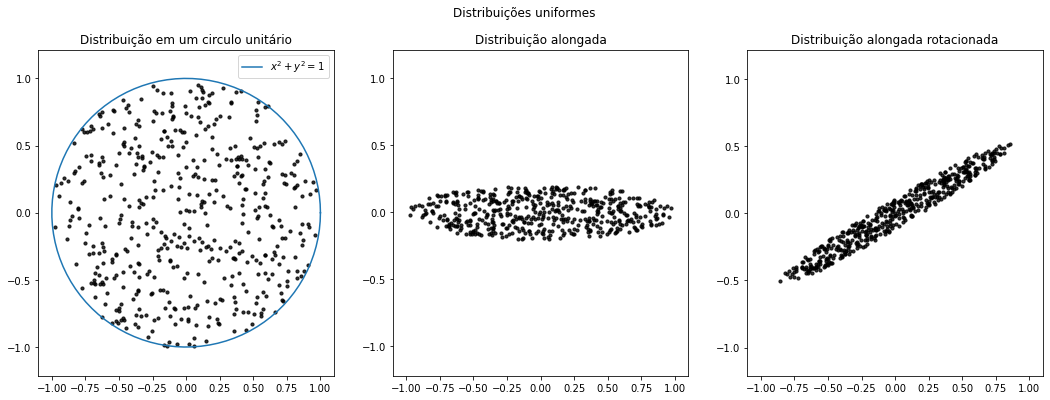

In [61]:
import numpy as np
import matplotlib.pyplot as plt

N = 500
circle = [[],[]]
dist_x = []
dist_y = []

while len(dist_x) <= N:
    # Gera uma distribuição normal entre [-1,1]
    x,y = np.random.rand(2)*2 -1
    
    #verifica se o ponto esta num circulo unitário de raio 1
    if x**2+y**2 <=1:
        circle[0].append(x)
        circle[1].append(y)
        dist_x.append(x)
        dist_y.append(y*0.2) #quanto mais comprimido mais redundante, uma reta seria a mais redundante de todos
        
#matriz de rotação         
rot = [[np.cos(np.pi/6), np.sin(np.pi/6)], [np.sin(np.pi/6), np.cos(np.pi/6)]]   

#faz a rotação
result = np.dot(rot, [dist_x,dist_y])
#print(len(result))

fig, ax = plt.subplots(1, 3, figsize=(6*3, 6), sharex=True)


fig.suptitle("Distribuições uniformes")
ax[0].set_title("Distribuição em um circulo unitário")
ax[1].set_title("Distribuição alongada")
ax[2].set_title("Distribuição alongada rotacionada")
# ax[0].set_xlim(-1.1,1.1)
# ax[0].set_ylim(-1.1,1.1)
for i in range(3):
    ax[i].axis('equal')
#     ax[i].set_xlim(-1.1,1.1)
#     ax[i].set_ylim(-1.1,1.1)

an = np.linspace(0, 2 * np.pi, 100)
ax[0].plot(np.cos(an), np.sin(an), label= "$x^2+y^2=1$")
ax[0].scatter(circle[0],circle[1],color = "black" , alpha = 0.8, s = 10)
ax[1].scatter(dist_x, dist_y, color = "black", alpha = 0.8, s = 10)
ax[2].scatter(result[0], result[1], color = "black", alpha = 0.8, s = 10)
# plt.savefig("images/uniform_dist.png")
ax[0].legend()
plt.show()

---
### Matriz de covariância K

Matriz de covariância K:
 [[0.17599198 0.10429091]
 [0.10429091 0.06524675]]


lambda = [0.23869866 0.00254007] 
 v = [[ 0.85701351 -0.51529393]
 [ 0.51529393  0.85701351]]

Q = [[ 0.85701351 -0.51529393]
 [ 0.51529393  0.85701351]]


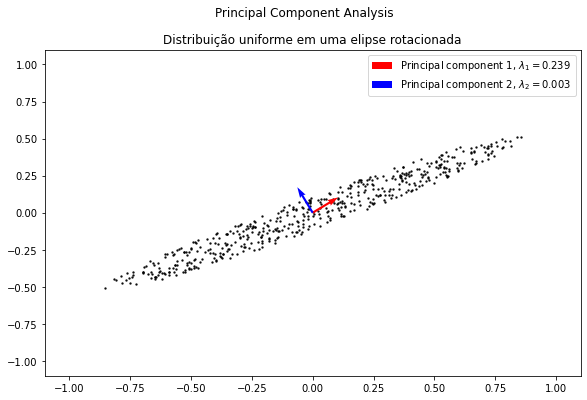

[[ 0.85701351 -0.51529393]
 [ 0.51529393  0.85701351]]
[0.85701351 0.51529393]
[-0.51529393  0.85701351]


In [113]:
K = np.cov(result)
print("Matriz de covariância K:\n %s\n"%K)
eigenvalue, eigenvector = np.linalg.eig(K)

if eigenvalue[0]<eigenvalue[1]: #garante ordem decrescente para o caso N=2
    eigenvalue[::-1]
    eigenvector[::-1]
    if (len(eigenvalue)>2):
        print("Sort Error")
    
print("\nlambda = %s \n v = %s\n"%(eigenvalue, eigenvector))
print("Q = %s" %eigenvector)
fig, ax = plt.subplots(1, 1, figsize=(9.6, 6))
fig.suptitle("Principal Component Analysis")
ax.set_title("Distribuição uniforme em uma elipse rotacionada")

ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)

ax.scatter(result[0], result[1], color = "black", alpha = 0.8, s = 2)
ax.quiver(*[0,0], *eigenvector[:,0], width = 0.004, color = "red", label= "Principal component 1, $\lambda_1 = %.3f$"%eigenvalue[0])
ax.quiver(*[0,0], *eigenvector[:,1], width = 0.004, color = "blue", label= "Principal component 2, $\lambda_2 = %.3f$"%eigenvalue[1])
plt.legend()
plt.show()
print(eigenvector)
print(eigenvector[:,0])
print(eigenvector[:,1])